In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data from sources

In [4]:
%pwd

'/home/sumedhshah94/w266_project_topmusichits/src/data'

In [5]:
#Load songs and charts data (use pwd to change to find directory)
songs = pd.read_csv("/home/sumedhshah94/w266_project_topmusichits/data/raw/spotify_songs.csv",',')
charts = pd.read_csv("/home/sumedhshah94/w266_project_topmusichits/data/raw/billboard_hot_100_charts.csv",',')

In [ ]:
# Preview songs data
songs.head()

In [ ]:
# Preview charts data
charts.head(10)

# Clean Songs and Charts Datasets

In [6]:
# CLEANING CHARTS DATASET
# Extract year
charts['WeekID'] = pd.to_datetime(charts['WeekID'].str.strip(),format='%m/%d/%Y')
charts['Year'] = pd.DatetimeIndex(charts['WeekID']).year
print("Original number of rows:",len(charts))


# Filter out columns and remove duplicate rows
new_charts = charts[['Year','Song','Performer','Weeks on Chart']]
new_charts = new_charts.sort_values('Weeks on Chart', ascending=False).drop_duplicates(['Year',
                                                                                        'Song',
                                                                                        'Performer'])
print("Number of rows after dropping duplicates:",len(new_charts))

# Filter out songs older than 1980 and newer than 2020
new_charts = new_charts[(new_charts['Year']>=1980) & (new_charts['Year']<=2020)]
new_charts[new_charts.duplicated(['Year','Song','Performer'])]

print("Number of rows after filtering years:",len(new_charts))

Original number of rows: 327895
Number of rows after dropping duplicates: 35787
Number of rows after filtering years: 20359


In [7]:
# Preview new charts dataframe
new_charts.head(20)

,Year,Song,Performer,Weeks on Chart
302681,2014,Radioactive,Imagine Dragons,87
302673,2014,Sail,AWOLNATION,79
278572,2009,I'm Yours,Jason Mraz,76
278565,1998,How Do I Live,LeAnn Rimes,69
297512,2014,Counting Stars,OneRepublic,68
302641,2013,Radioactive,Imagine Dragons,68
302643,2012,Party Rock Anthem,LMFAO Featuring Lauren Bennett & GoonRock,68
302638,2013,Sail,AWOLNATION,67
302631,2012,Rolling In The Deep,Adele,65
278557,1998,Foolish Games/You Were Meant For Me,Jewel,65


In [8]:
# Rename column
new_charts.rename(columns={'Weeks on Chart': 'Weeks_On_Chart'}, inplace=True)
new_charts.head()

,Year,Song,Performer,Weeks_On_Chart
302681,2014,Radioactive,Imagine Dragons,87
302673,2014,Sail,AWOLNATION,79
278572,2009,I'm Yours,Jason Mraz,76
278565,1998,How Do I Live,LeAnn Rimes,69
297512,2014,Counting Stars,OneRepublic,68


In [9]:
# CLEANING SONGS DATASET
print("Original size of songs dataset: ",len(songs))

# Convert to lower case
songs["track_name"] = songs["track_name"].str.lower()
songs["track_artist"] = songs["track_artist"].str.lower()

# Drop duplicate song/artist names
songs = songs.drop_duplicates(subset=['track_name','track_artist'])

# Extract year from track album release date
songs['Date'] = pd.to_datetime(songs['track_album_release_date'],
                                        format='%Y-%m-%d')
songs['song_year'] = pd.DatetimeIndex(songs['Date']).year



# Filter out songs older than 1980 and newer than 2020
songs = songs[(songs['song_year']>=1980) & (songs['song_year']<=2020)]

print("New size of songs dataset: ",len(songs))

Original size of songs dataset:  18454
New size of songs dataset:  15823


# Merge datasets

In [10]:
# Make song and performer lowercase
new_charts["Song"] = new_charts["Song"].str.lower()
new_charts["Performer"] = new_charts["Performer"].str.lower()

In [11]:
# Merge dataframes (left) and check record sizes
songs_charts = songs.merge(new_charts,
                        left_on=['track_name','track_artist'],
                        right_on=['Song','Performer'],how='left')

# Check new length of merged dataset
print(len(songs_charts))


16601


In [12]:
# Indicate whether song is on Billboard charts or not
songs_charts['Hit'] = np.where(songs_charts['Weeks_On_Chart'].isnull(),0,1)

In [13]:
# Rename column
songs_charts.rename(columns={'Year': 'trending_year'}, inplace=True)

# Drop some merged columns
songs_charts = songs_charts.drop(columns=['Date','track_id','track_album_id','track_album_release_date',
                                          'playlist_id','Song','Performer'])

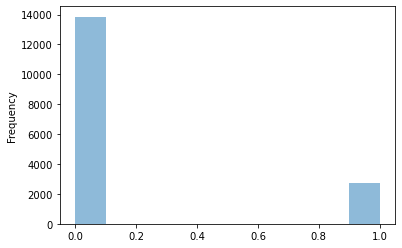

In [14]:
# See difference in number of hits vs non-hits in merged dataset
ax = songs_charts['Hit'].plot.hist(alpha=0.5)

In [15]:
# Fill na values with 0 and attempt to convert column type to int
songs_charts['Weeks_On_Chart'] = songs_charts['Weeks_On_Chart'].fillna(0)
songs_charts['Weeks_On_Chart'] = songs_charts['Weeks_On_Chart'].apply(pd.to_numeric)

In [16]:
songs_charts = songs_charts[songs_charts.language=='en']

In [17]:
songs_charts.head(15)

,track_name,track_artist,lyrics,track_popularity,track_album_name,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,...,instrumentalness,liveness,valence,tempo,duration_ms,language,song_year,trending_year,Weeks_On_Chart,Hit
1,i feel alive,steady rollin,"The trees, are singing in the wind The sky blu...",28,Love & Loss,Hard Rock Workout,rock,hard rock,0.303,0.880,...,0.009940,0.3470,0.404,135.225,373512,en,2017,NaN,0.0,0
2,poison,bell biv devoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,Gold,"Back in the day - R&B, New Jack Swing, Swingbe...",r&b,new jack swing,0.845,0.652,...,0.007230,0.4890,0.650,111.904,262467,en,2005,1990.0,22.0,1
3,baby it's cold outside (feat. christina aguilera),ceelo green,I really can't stay Baby it's cold outside I'v...,41,CeeLo's Magic Moment,Christmas Soul,r&b,neo soul,0.425,0.378,...,0.000000,0.0664,0.405,118.593,243067,en,2012,NaN,0.0,0
4,dumb litty,kard,Get up out of my business You don't keep me fr...,65,KARD 2nd Digital Single ‘Dumb Litty’,K-Party Dance Mix,pop,dance pop,0.760,0.887,...,0.000000,0.1380,0.240,130.018,193160,en,2019,NaN,0.0,0
5,soldier,james tw,"Hold your breath, don't look down, keep trying...",70,Chapters,urban contemporary,r&b,urban contemporary,0.496,0.639,...,0.000000,0.0975,0.305,147.764,224720,en,2019,NaN,0.0,0
6,satisfy you,diddy,All I want is somebody who's gonna love me for...,52,Forever,"Swingbeat (old skool), New Jack Swing, R&B, Hi...",r&b,new jack swing,0.764,0.594,...,0.000000,0.1450,0.695,87.261,286441,en,1999,NaN,0.0,0
7,tender lover,babyface,Feels good Everybody Tender lover Tender love ...,36,Tender Lover,New Jack Swing,r&b,new jack swing,0.743,0.860,...,0.000422,0.0513,0.687,102.459,259267,en,1989,1990.0,17.0,1
8,tender lover,babyface,Feels good Everybody Tender lover Tender love ...,36,Tender Lover,New Jack Swing,r&b,new jack swing,0.743,0.860,...,0.000422,0.0513,0.687,102.459,259267,en,1989,1989.0,7.0,1
9,hide away (feat. envy monroe),blasterjaxx,"Don't run away, it's getting colder Our hearts...",42,Hide Away (feat. Envy Monroe),Big Room EDM - by Spinnin' Records,edm,big room,0.573,0.746,...,0.000000,0.3610,0.134,130.001,188000,en,2019,NaN,0.0,0
12,limestone,magic city hippies,How many friends are you gonna set on fire? Ho...,58,Hippie Castle EP,Indie Poptimism,pop,indie poptimism,0.706,0.457,...,0.008490,0.0614,0.723,78.014,209165,en,2015,NaN,0.0,0


In [18]:
# Save dataset to raw/interim
songs_charts.to_csv("/home/sumedhshah94/w266_project_topmusichits/data/interim/songs_charts.csv")

## Misc Analysis

In [ ]:
# Merge dataframes (inner) and check record sizes
songs_charts_trial = songs.merge(new_charts,
                        left_on=['track_name','track_artist'],
                        right_on=['Song','Performer'],how='inner')

# Check that majority of charted songs are in merged dataset
print(len(songs_charts_trial))

In [ ]:
# Check duplicate records
duplicate = songs_charts_trial[songs_charts_trial.duplicated(['track_name','track_artist'])].sort_values('track_name')
duplicate.head(10)

In [ ]:
# Check specific songs that have duplicate records
new_charts[new_charts.Song=='22']

In [19]:
songs = pd.read_csv("/home/sumedhshah94/w266_project_topmusichits/data/interim/songs_charts.csv",',')
songs.head(20)

,Unnamed: 0,track_name,track_artist,lyrics,track_popularity,track_album_name,playlist_name,playlist_genre,playlist_subgenre,danceability,...,instrumentalness,liveness,valence,tempo,duration_ms,language,song_year,trending_year,Weeks_On_Chart,Hit
0,1,i feel alive,steady rollin,"The trees, are singing in the wind The sky blu...",28,Love & Loss,Hard Rock Workout,rock,hard rock,0.303,...,0.009940,0.3470,0.404,135.225,373512,en,2017,NaN,0.0,0
1,2,poison,bell biv devoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,Gold,"Back in the day - R&B, New Jack Swing, Swingbe...",r&b,new jack swing,0.845,...,0.007230,0.4890,0.650,111.904,262467,en,2005,1990.0,22.0,1
2,3,baby it's cold outside (feat. christina aguilera),ceelo green,I really can't stay Baby it's cold outside I'v...,41,CeeLo's Magic Moment,Christmas Soul,r&b,neo soul,0.425,...,0.000000,0.0664,0.405,118.593,243067,en,2012,NaN,0.0,0
3,4,dumb litty,kard,Get up out of my business You don't keep me fr...,65,KARD 2nd Digital Single ‘Dumb Litty’,K-Party Dance Mix,pop,dance pop,0.760,...,0.000000,0.1380,0.240,130.018,193160,en,2019,NaN,0.0,0
4,5,soldier,james tw,"Hold your breath, don't look down, keep trying...",70,Chapters,urban contemporary,r&b,urban contemporary,0.496,...,0.000000,0.0975,0.305,147.764,224720,en,2019,NaN,0.0,0
5,6,satisfy you,diddy,All I want is somebody who's gonna love me for...,52,Forever,"Swingbeat (old skool), New Jack Swing, R&B, Hi...",r&b,new jack swing,0.764,...,0.000000,0.1450,0.695,87.261,286441,en,1999,NaN,0.0,0
6,7,tender lover,babyface,Feels good Everybody Tender lover Tender love ...,36,Tender Lover,New Jack Swing,r&b,new jack swing,0.743,...,0.000422,0.0513,0.687,102.459,259267,en,1989,1990.0,17.0,1
7,8,tender lover,babyface,Feels good Everybody Tender lover Tender love ...,36,Tender Lover,New Jack Swing,r&b,new jack swing,0.743,...,0.000422,0.0513,0.687,102.459,259267,en,1989,1989.0,7.0,1
8,9,hide away (feat. envy monroe),blasterjaxx,"Don't run away, it's getting colder Our hearts...",42,Hide Away (feat. Envy Monroe),Big Room EDM - by Spinnin' Records,edm,big room,0.573,...,0.000000,0.3610,0.134,130.001,188000,en,2019,NaN,0.0,0
9,12,limestone,magic city hippies,How many friends are you gonna set on fire? Ho...,58,Hippie Castle EP,Indie Poptimism,pop,indie poptimism,0.706,...,0.008490,0.0614,0.723,78.014,209165,en,2015,NaN,0.0,0


In [ ]:
songs.shape

In [ ]:
songs_2 = songs

In [ ]:
songs_2.dtypes

In [ ]:
# Check english songs by year
songs_2[songs_2.language=='en'].song_year.value_counts()

In [ ]:
# English hits
my_crosstab_2 = pd.crosstab(index=songs_2["playlist_genre"], 
                            columns=songs["Hit"],
                             margins=True)


In [ ]:
my_crosstab_2

In [ ]:
# All languages hits
my_crosstab = pd.crosstab(index=songs["playlist_genre"], 
                            columns=songs["Hit"],
                             margins=True)

In [ ]:
my_crosstab

In [ ]:
# Check hits by song year
my_crosstab_3 = pd.crosstab(index=songs_2["song_year"], 
                            columns=songs_2["Hit"],
                             margins=True)
my_crosstab_3